### Imports

In [1]:
import sys
sys.path.insert(0, "..")
from utils.dataset_utils import OriginalDataset, plot_image_array, plot_delta

# Standard Downloads
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
original_dataset = OriginalDataset('../datasets/droid_100_sample_pictures')
len_ = (original_dataset.__len__())
print(len_)

168


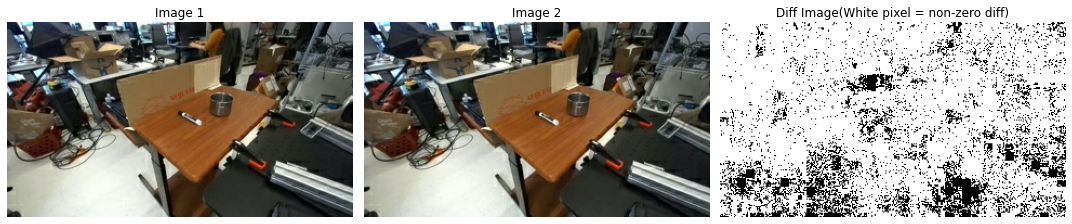

In [3]:
image1 = original_dataset[2]
image2 = original_dataset[3]

non_zero_diff_count, image3 = plot_delta(image2 - image1)
# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap="gray")
axes[2].set_title('Diff Image(White pixel = non-zero diff)')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

Traversing strategy:

Row by Row, Left to Right

In [4]:
rle = []
image3[3]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
non_zero_diff_count

46948

### Original Image Storage

In [6]:
num_pixels = image1.shape[0]* image1.shape[1]
bit_size = num_pixels * image1.shape[2] * 8
Mb_size = bit_size / (10 ** 6)
print(f"Original Image Storage(Mb)", Mb_size)

Original Image Storage(Mb) 1.3824


In [21]:
image1.shape[0]

180

In [22]:
image1.shape[1]

320

In [23]:
180 * 320

57600

### Compressed Image Storage

In [7]:
# a single bit for every pixel location, where 1 represents there is a diff

bit_map_storage = image1.shape[0]* image1.shape[1] * 1
sparse_representation_bit_size = non_zero_diff_count * 3 * 8

total_mb_size = (bit_map_storage + sparse_representation_bit_size) / (10 ** 6)
print(f"Compressed Image Storage(Mb) = ", total_mb_size)

Compressed Image Storage(Mb) =  1.184352


## Compression Ratio


In [8]:
total_mb_size / Mb_size

0.8567361111111111

Text(0, 0.5, 'Frequency')

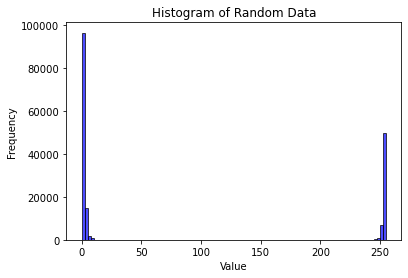

In [20]:
import matplotlib.pyplot as plt
import numpy as np
data = image1 - image2
data = data.flatten()
plt.hist(data, bins=100, alpha=0.7, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of image diffs')
plt.xlabel('Value')
plt.ylabel('Frequency')


In [9]:
20th/Oct Sunday
# task1: running for all images -select a dataset and standardise the comparison - akash
# task2: - akash
    # plot histogram of the diffs of (image1 - image2)
    properly plot the histogram so that all the diff values are visible
    # channel wise histogram
# task3: billy and suman
    # look into huffman encoding
    # encode the diffs with lower number of bits(for smaller values) with anomalies (position encoding
#task4 priyam
    # investigate the 255 diff value
#task5 priyam
    # roaring bitmaps
#task 6 - akash
 compress image first and then sequence of images 